In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
try:
    data = pd.read_csv('/datasets/gym_churn_us.csv')
except:
    data = pd.read_csv('/Users/adiel/Downloads/gym_churn_us.csv')

In [4]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
data.shape

(4000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [8]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
data.duplicated().sum()

0

In [10]:
#make the columns lower
data = data.rename(columns=str.lower)
data.head(1)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.22747,5.0,3,0.020398,0.0,0


In [11]:
print('The ratio between churn:\n', data['churn'].value_counts())

The ratio between churn:
 0    2939
1    1061
Name: churn, dtype: int64


In [12]:
gr = data.groupby('churn').mean().reset_index()
gr

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


users who left the gym


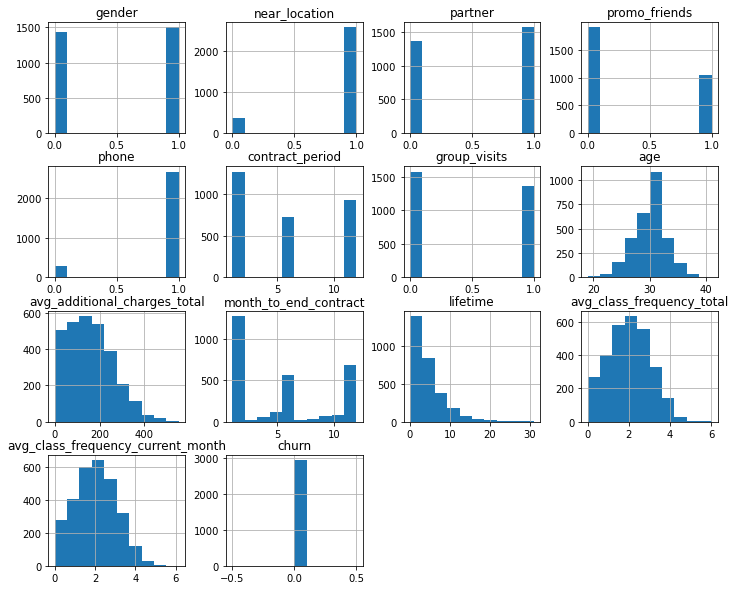

In [13]:
print('users who left the gym')
data[data['churn']==0].hist(figsize=(12,10));

users who stay


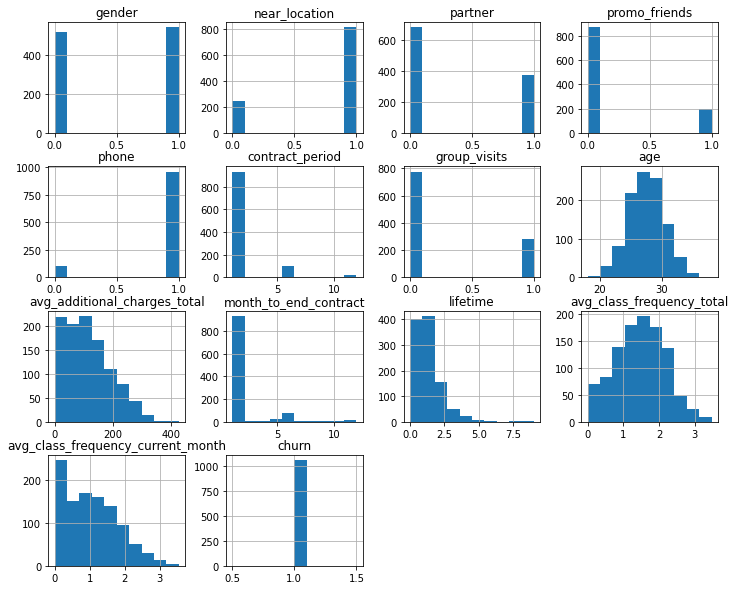

In [14]:
print('users who stay')
data[data['churn']==1].hist(figsize=(12, 10));

[Text(0.5, 1.0, 'diffrents of left or stay users')]

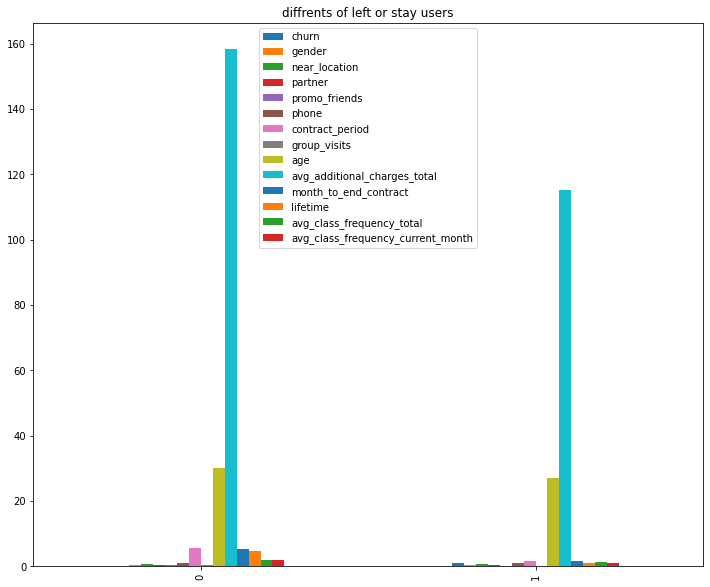

In [15]:
gr.plot(kind='bar',figsize=(12, 10)).set(title='diffrents of left or stay users')

- in the dataframe there are alot more users who will leave the gym and in almost all the data their average values are higher off users who stays 

- in average users who left enrolled in the gym for a period of 6 months, but leave after the first month 

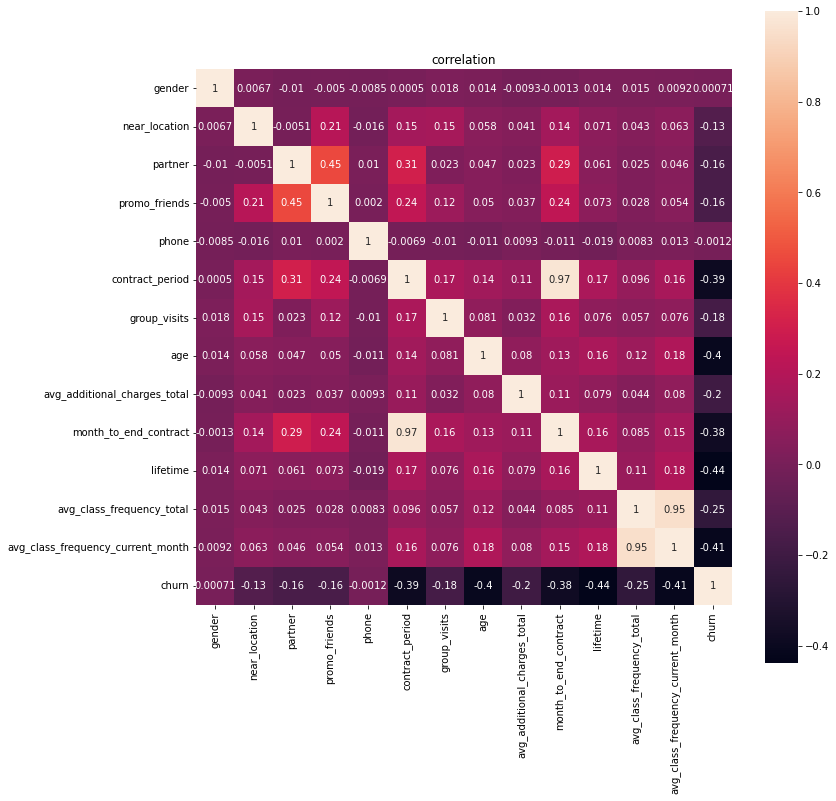

In [16]:
cm = data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot = True, square=True).set(title='correlation')
ax.set_ylim(14, 0)
plt.show()

- there is strong correlation between 'avg_class_frequency_total' and 'avg_class_frequency_current_month',and also between 'month_to_end_contract' and contract_period, That it makes a lot of sense because these values are inseparable

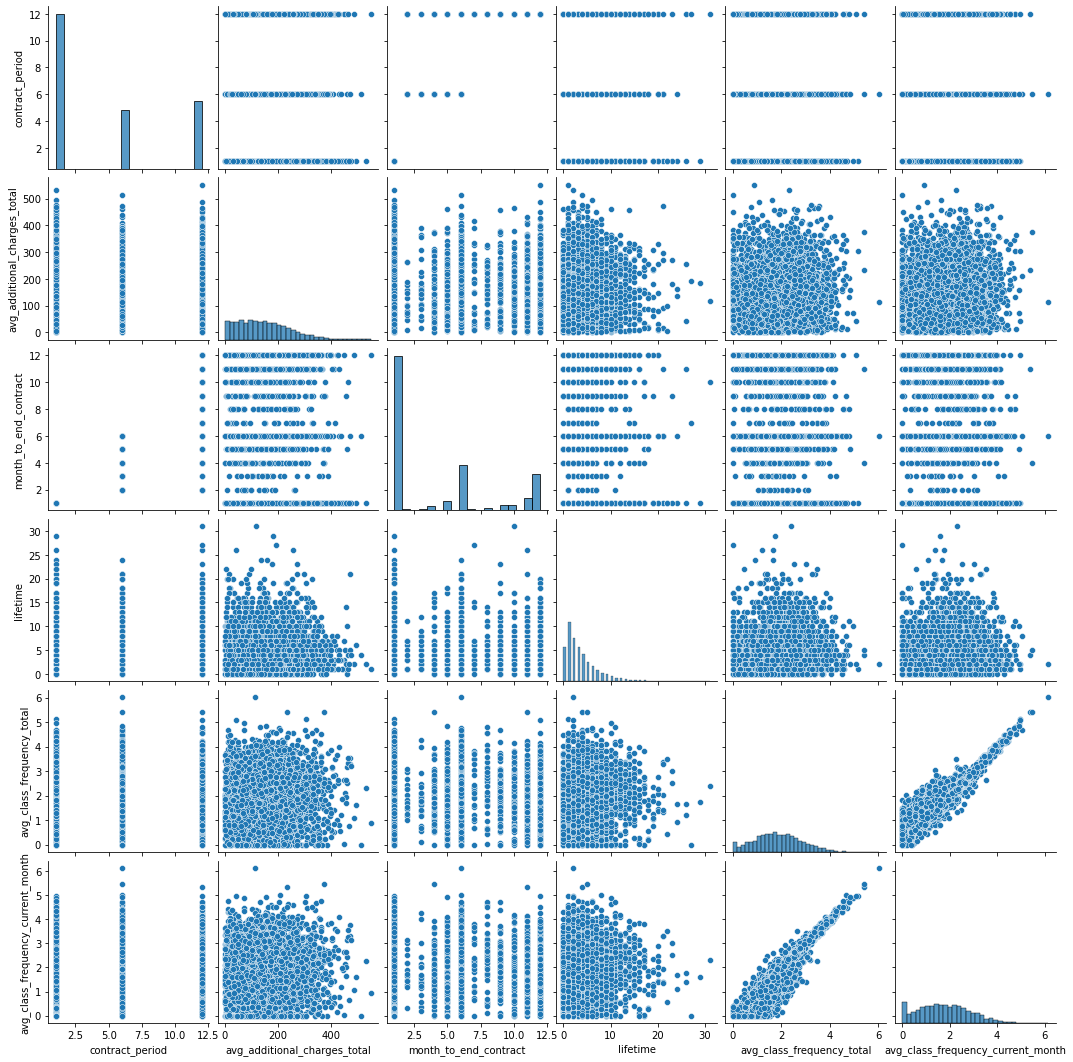

In [17]:
sns.pairplot(data[['contract_period','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']])

# binary classification model 

In [28]:
X = data.drop('churn', axis = 1)
y = data['churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# scalling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [21]:
# the selected models
model = LogisticRegression(random_state=0)
tr_model =  RandomForestClassifier(n_estimators = 100,random_state=0)

In [22]:
model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [23]:
tr_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [24]:
predictions = model.predict(X_test_st)

In [25]:
tr_predictions = tr_model.predict(X_test_st)

In [26]:
def test(y_true,y_pred,name, title = 'Classification metrics'):
    print(title,name)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('-------------------------------------')
test(y_test,predictions,model, title = 'Metrics for :')    
test(y_test,tr_predictions,tr_model, title = 'Metrics for :')

Metrics for : LogisticRegression(random_state=0)
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
-------------------------------------
Metrics for : RandomForestClassifier(random_state=0)
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
-------------------------------------


- the logistic regression model gave  better result so we will use him for the task of finding churn

# k-means model

In [27]:
new_data = data.drop('churn',axis=1)
new_data.shape

(4000, 13)

In [29]:
sc = StandardScaler()
sc_ = sc.fit_transform(new_data)
linked = linkage(sc_, method = 'ward') 

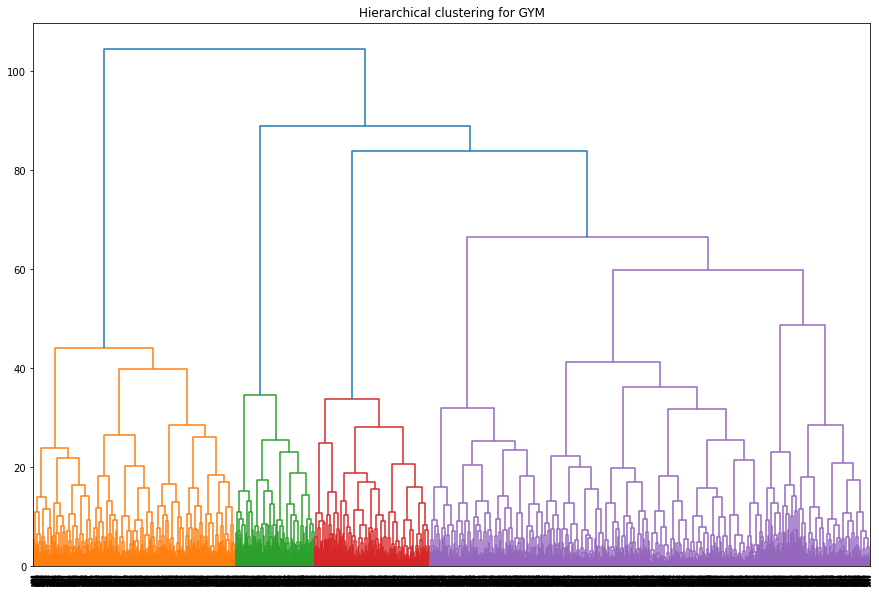

In [30]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

In [31]:
scc = StandardScaler()
scc_ = scc.fit_transform(data)

In [33]:
# Use silhouette coefficient to determine the best number of clusters
for n_cluster in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        data)
    
    silhouette_avg = silhouette_score(
        data, 
        kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.5783
Silhouette Score for 3 Clusters: 0.5378
Silhouette Score for 4 Clusters: 0.5234
Silhouette Score for 5 Clusters: 0.5006
Silhouette Score for 6 Clusters: 0.4809


In [37]:
km = KMeans(n_clusters =5,random_state=0)

In [38]:
labels = km.fit_predict(scc_)
data['cluster'] = labels

In [39]:
# group the data by cluster
c_group = data.groupby('cluster').mean().reset_index()
c_group

,cluster,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


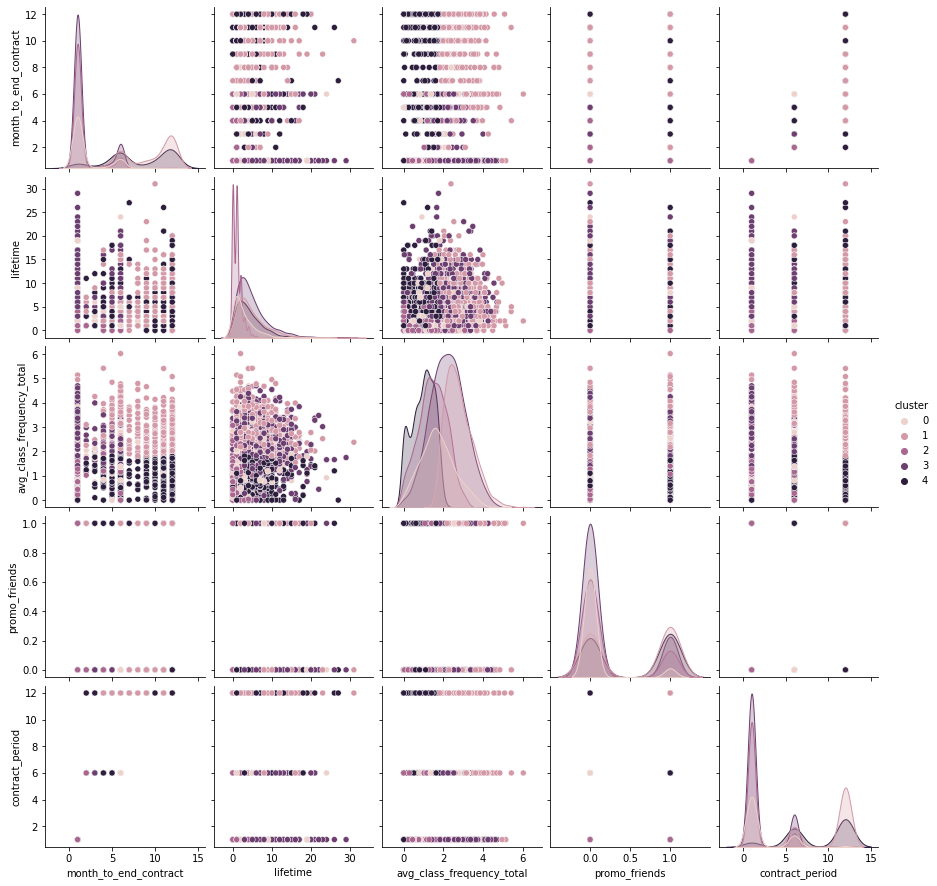

In [40]:
c = data[['month_to_end_contract','lifetime','avg_class_frequency_total','promo_friends','cluster','contract_period']]
sns.pairplot(c,hue='cluster');

In [41]:
# cluster churn
c_group[['cluster','churn']]

,cluster,churn
0,0,0.450368
1,1,0.007823
2,2,0.961023
3,3,0.003390
4,4,0.024709


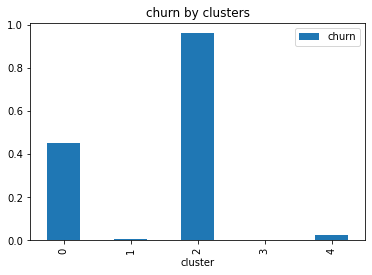

In [42]:
c_group[['cluster','churn']].plot(kind='bar',x='cluster',y='churn').set(title='churn by clusters');

# cluster conclusion:

- we can see that almost all of the users who are from the clusters where  the lifetime is  1 month will leave next month This  group of the new customers whose time in the gym does not exceed a month  

- in the clusters where lifetime is higher then 4 month all the users will stay in the next month  there life time is between 4.5-5 month in average

- You can see here a patren by the cluster data customers sign up for a month and then they decide to leave or to stay, after that they sign up for 3 months so they becume loyal to the gym,So the focus should be on new clients and create enough interest in them to stay at the gym for at least 4 months
-  By division I do not see importance to gender, location, age

- Most of the people who sign up for a year are also partners and have more promo friends most likely the  Gym gave them some kind of benefit